# Seaborn

** *NOTE: PLEASE DO NOT Restart & Clear Output, OTHERWISE YOU WILL LOSE SOME PLOTS THAT YOU HAVE TO REPLICATE IN THE EXERCISE PART AT THE END OF THE NOTEBOOK.* **

## Introduction

Seaborn is a library for making statistical graphics in Python. 
It builds on top of matplotlib and integrates with pandas data structures.

For more information, please visit the [documentation](https://seaborn.pydata.org/).

For the exam, you do not have to memorize any function.

## Installation 

To install matplotlib:

````conda install seaborn````

or

````pip install seaborn````

# Distribution Plots

We will discuss the following type of plots:

* displot
* jointplot
* pairplot
* rugplot
* kdeplot

## Importing

In [16]:
import seaborn as sns
%matplotlib inline

## Data
Built-in data sets in Seaborn.

In [17]:
import pandas as pd 
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
tips_sns = sns.load_dataset('tips')
tips_sns.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

## displot

`displot` shows the distribution of a univariate set of observations.

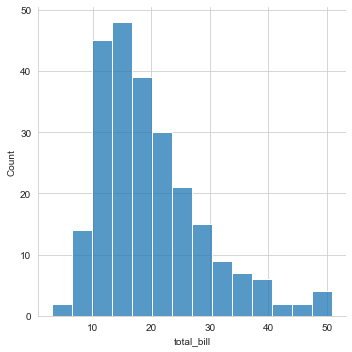

In [36]:
sns.displot(tips['total_bill'])

Without the kde (gaussian kernel density estimate) layer:

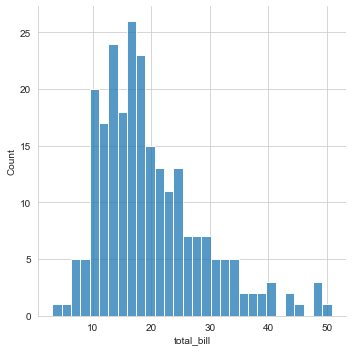

In [20]:
sns.displot(tips['total_bill'], kde=False, bins=30)

## jointplot

`jointplot` allows to match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

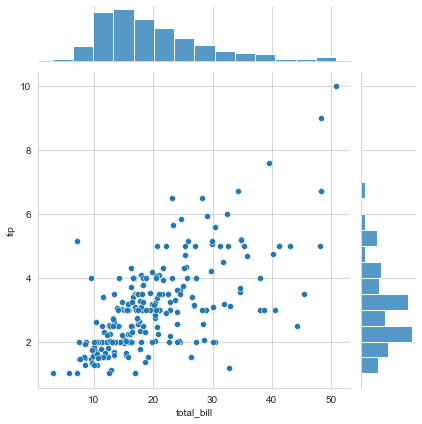

In [21]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

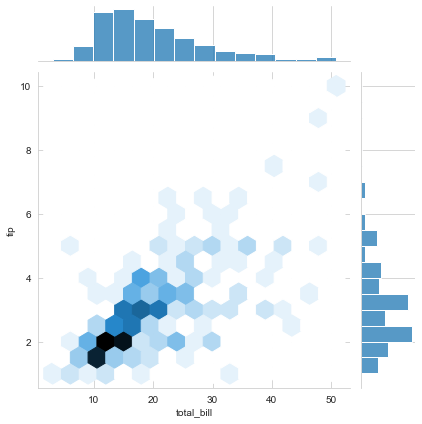

In [22]:
sns.jointplot(x='total_bill',y='tip', data=tips, kind='hex')

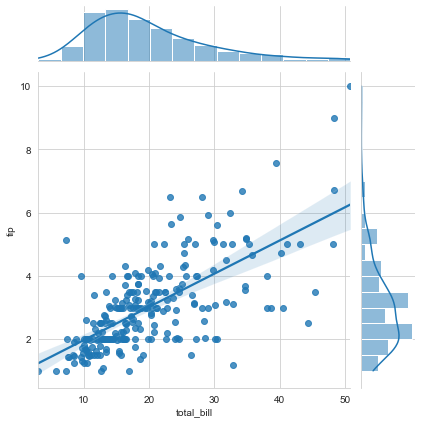

In [23]:
# Add regression and kernel density
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## pairplot

`pairplot` will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

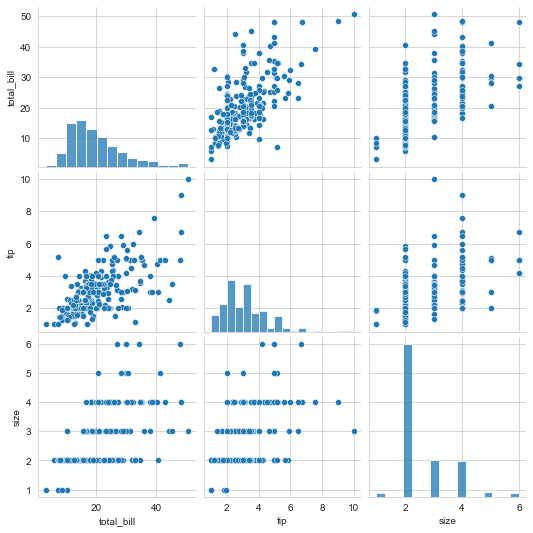

In [24]:
sns.pairplot(tips)

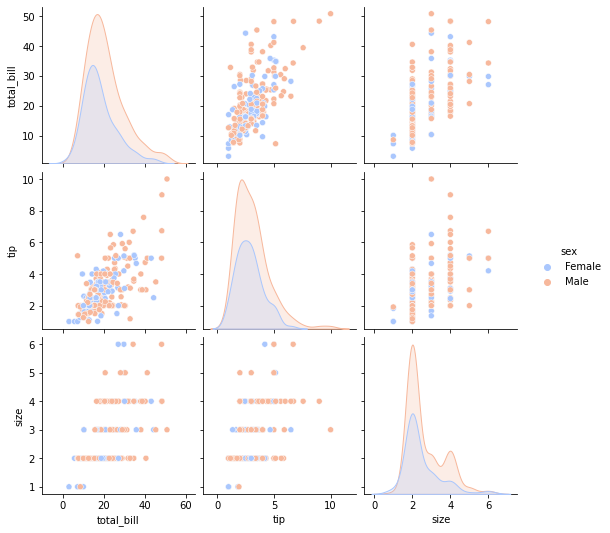

In [10]:
sns.pairplot(tips,hue='sex', palette='coolwarm')

## rugplot

`rugplots`: plot datapoints in an array as sticks on an axis.

<AxesSubplot:xlabel='total_bill'>

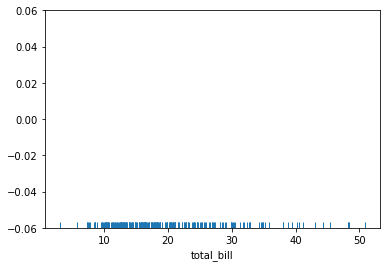

In [11]:
sns.rugplot(tips['total_bill'])

## kdeplot

`kdeplots` are Kernel Density Estimation Plots. KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. 

(0.0, 1.0)

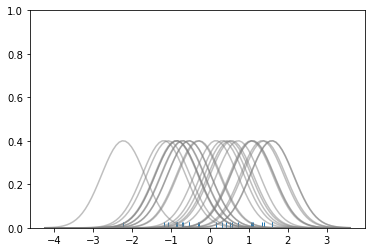

In [12]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

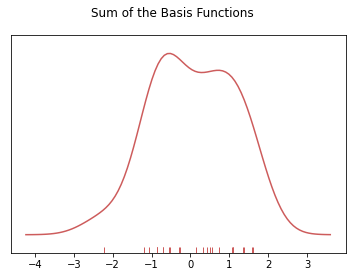

In [13]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with the tips dataset:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

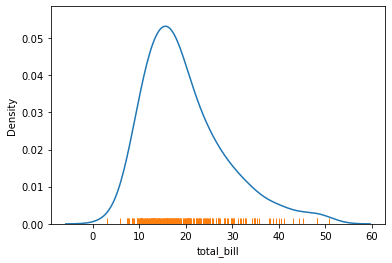

In [14]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

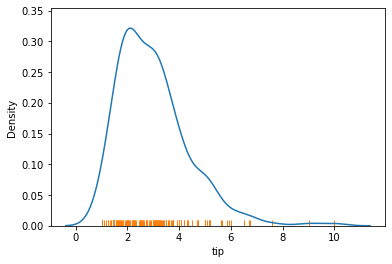

In [15]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

* barplot
* countplot
* boxplot
* violinplot
* stripplot
* swarmplot

## barplot and countplot

Plots to get aggregate data of a categorical feature in the data. `barplot` is a general plot that allows you to aggregate the categorical data based of some function, by default the mean:

In [38]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

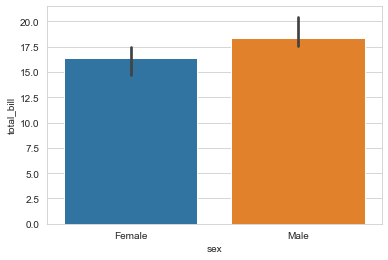

In [39]:
sns.barplot(x='sex', y='total_bill', data=tips,estimator=np.median)

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

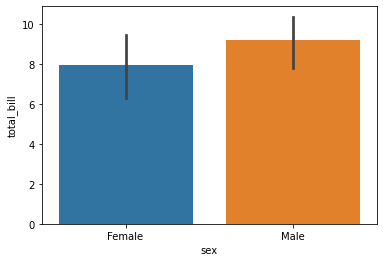

In [18]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### countplot

`countplot` is the same as `barplot` except the estimator is explicitly counting the number of occurrences. 

<AxesSubplot:xlabel='sex', ylabel='count'>

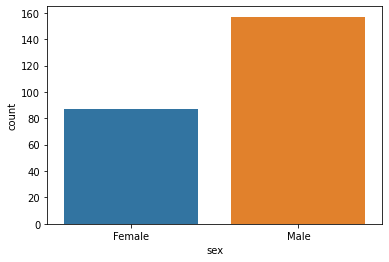

In [19]:
sns.countplot(x='sex', data=tips)

## boxplot and violinplot

`boxplots` and `violinplots` are used to shown the distribution of categorical data. A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

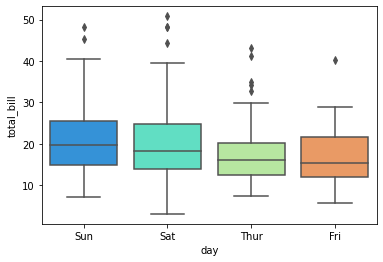

In [20]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

<AxesSubplot:>

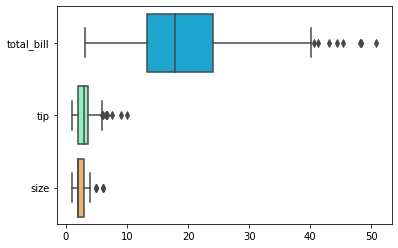

In [21]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips, palette='rainbow', orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

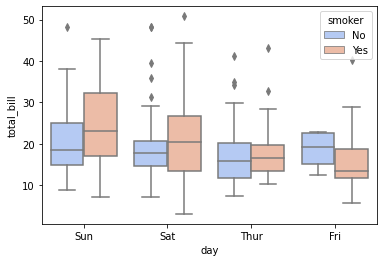

In [22]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

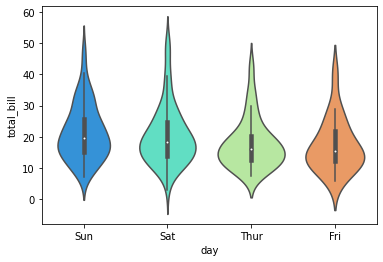

In [23]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

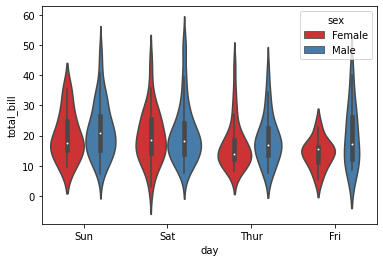

In [24]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

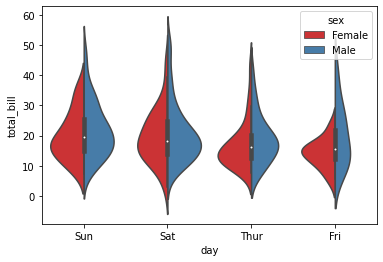

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
`stripplot` will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

`swarmplot` is similar to `stripplot`, but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

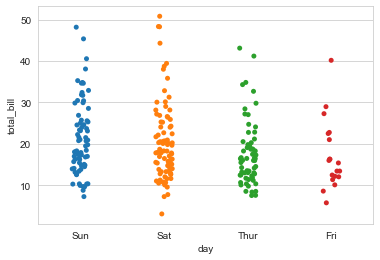

In [25]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

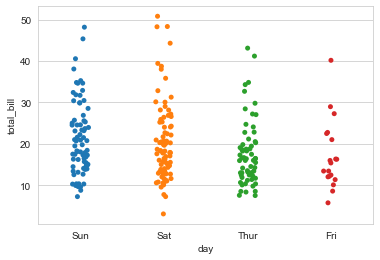

In [41]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

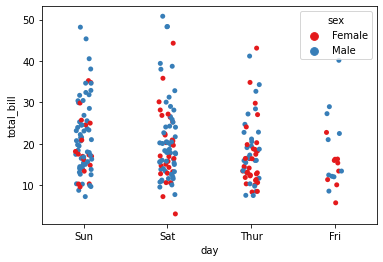

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

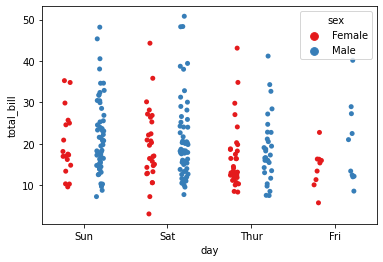

In [29]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

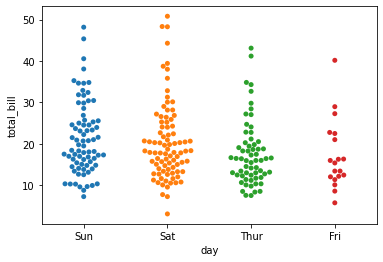

In [30]:
sns.swarmplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

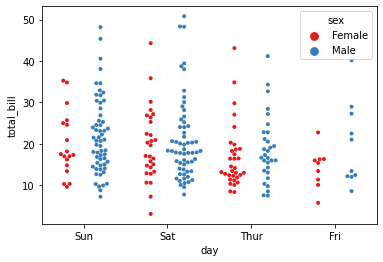

In [31]:
sns.swarmplot(x="day", y="total_bill", hue='sex', data=tips, palette="Set1", s= 4, dodge=True)

### Combining Categorical Plots

<AxesSubplot:xlabel='tip', ylabel='day'>

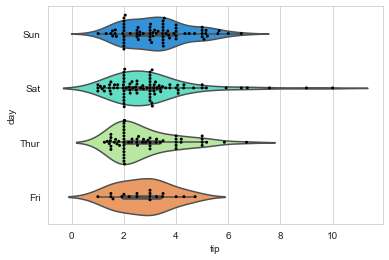

In [30]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black',size=3)

# Matrix Plots

Matrix plots are used to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

In [31]:
flights = pd.read_csv('flights.csv')
flights.head()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heatmap

In order for a `heatmap` to work properly, your data should already be in a matrix form.

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
# Matrix form for correlation data: Compute pairwise correlation of columns
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

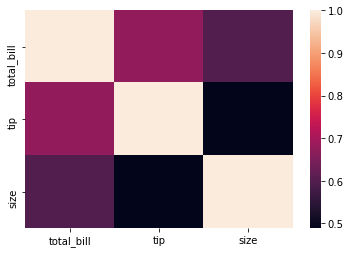

In [36]:
sns.heatmap(tips.corr())

<AxesSubplot:>

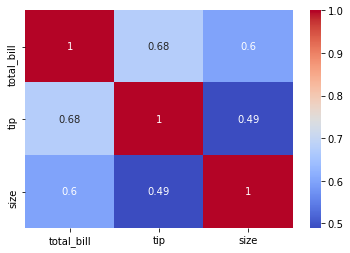

In [37]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

Or for the flights data:

In [38]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

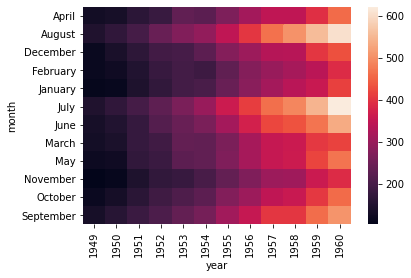

In [39]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

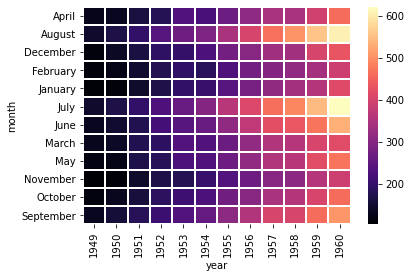

In [40]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)

## clustermap

`clustermap` uses hierarchal clustering to produce a clustered version of the heatmap.

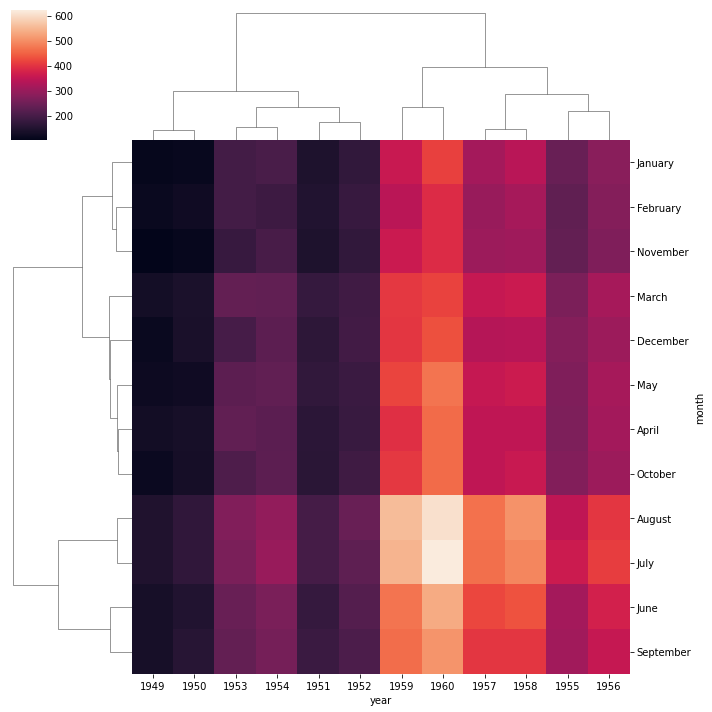

In [41]:
sns.clustermap(pvflights)

# Grids

Grids are general types of plots that allow to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [42]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

`PairGrid` is a subplot grid for plotting pairwise relationships in a dataset.

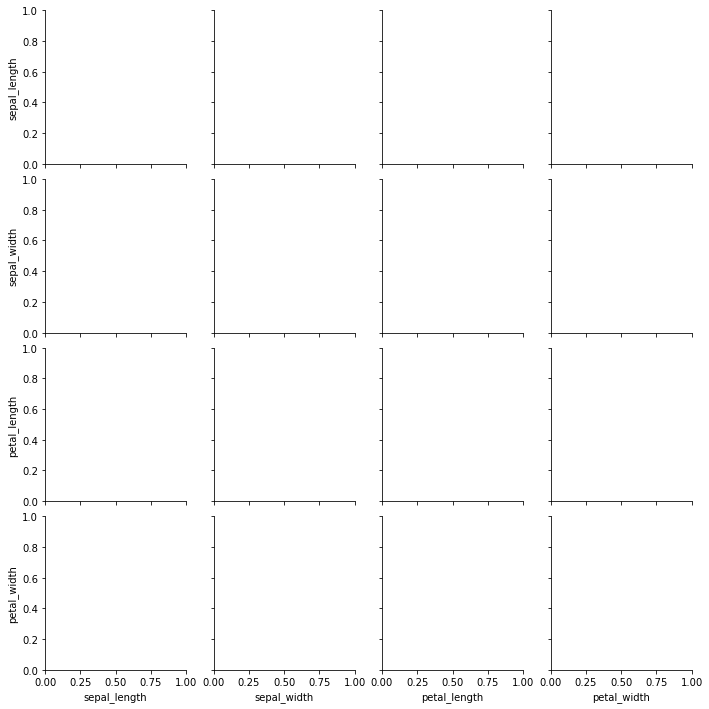

In [43]:
# Just the Grid
sns.PairGrid(iris)

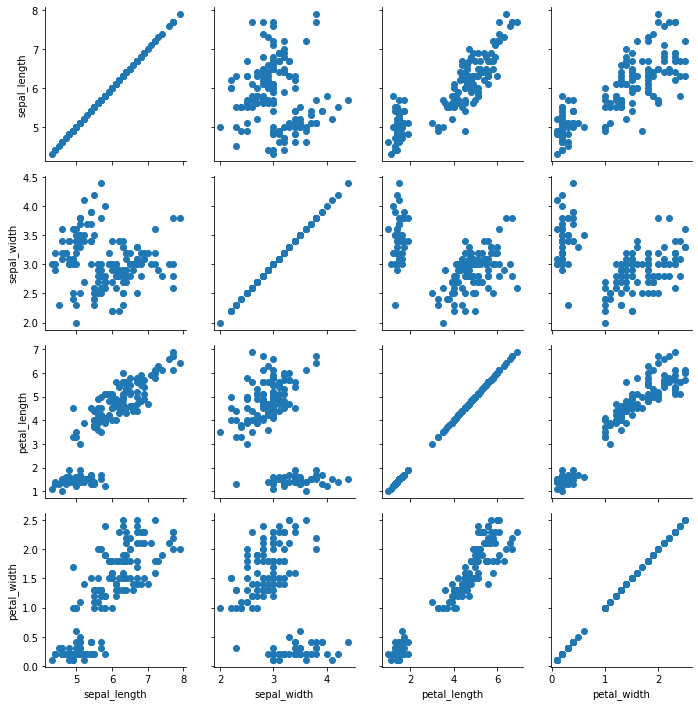

In [44]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter) # for all plots

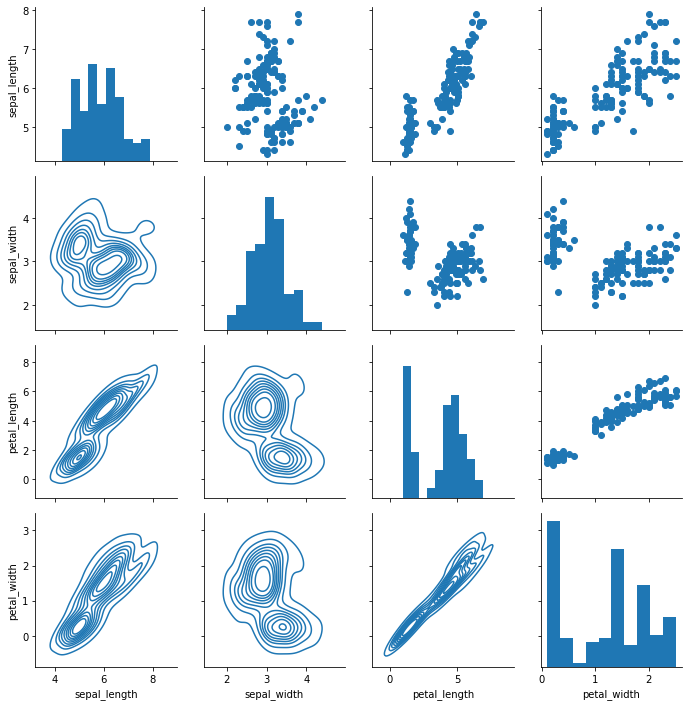

In [45]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

`pairplot` is a simpler version of PairGrid.

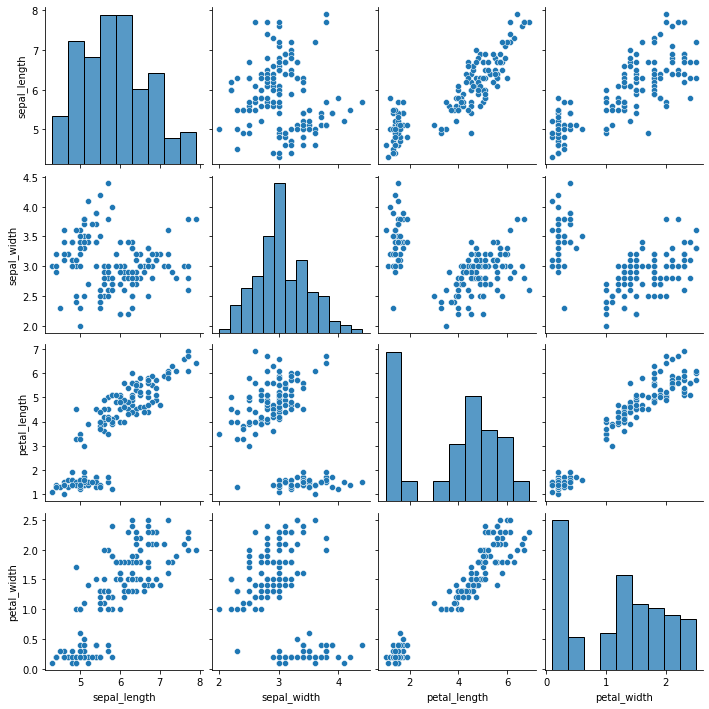

In [46]:
sns.pairplot(iris)

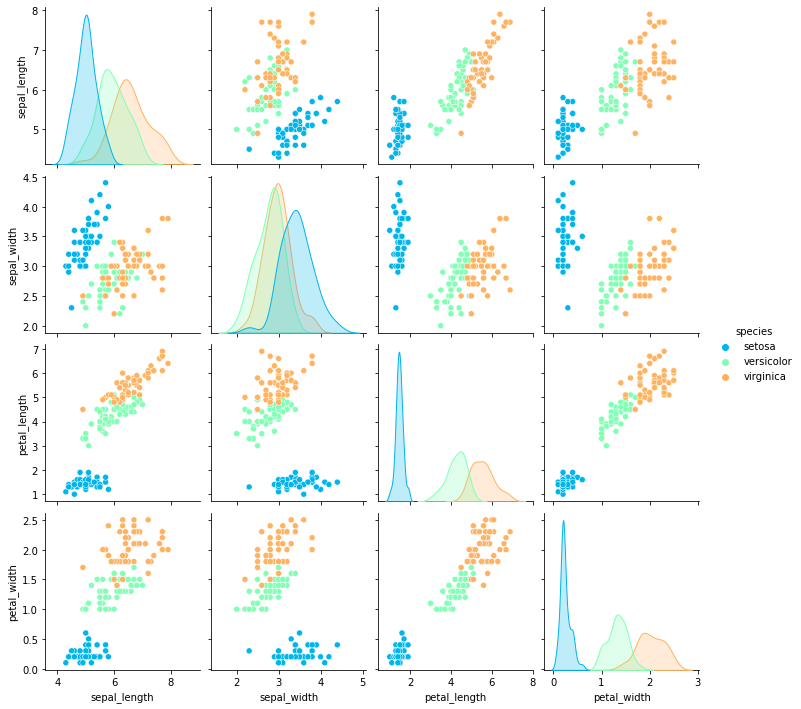

In [47]:
sns.pairplot(iris,hue='species', palette='rainbow')

## Facet Grid

`FacetGrid` is the general way to create grids of plots based on a feature:

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


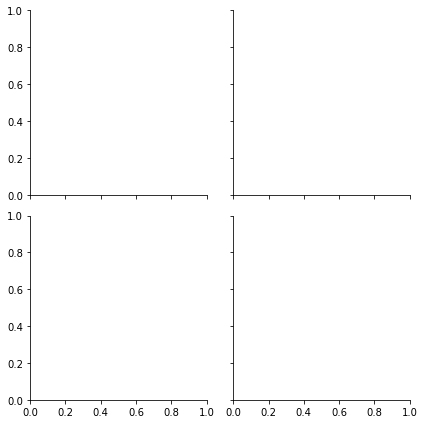

In [49]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

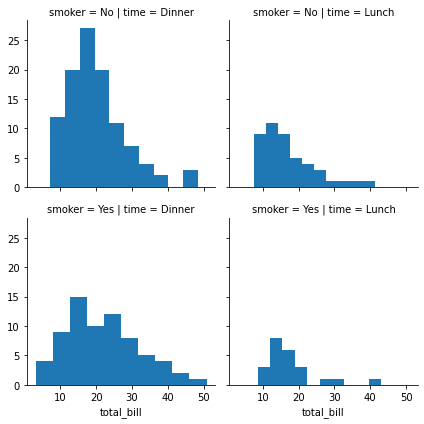

In [50]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

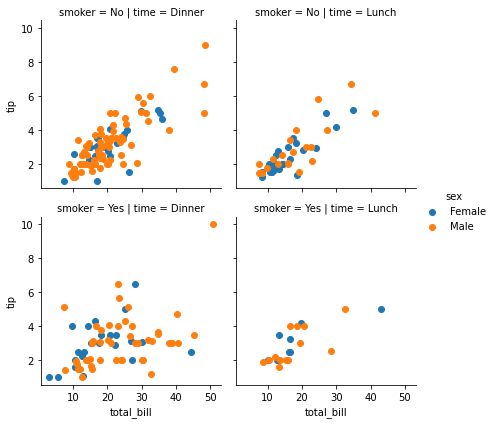

In [51]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

`JointGrid` is the general version for `jointplot` type grids.

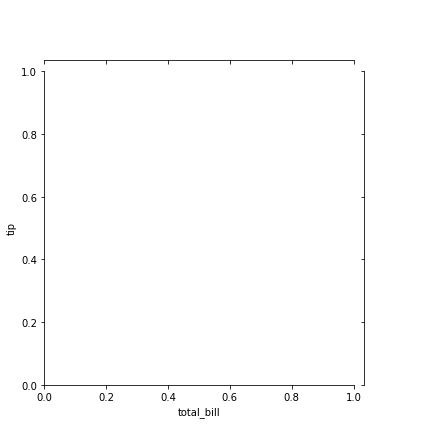

In [52]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

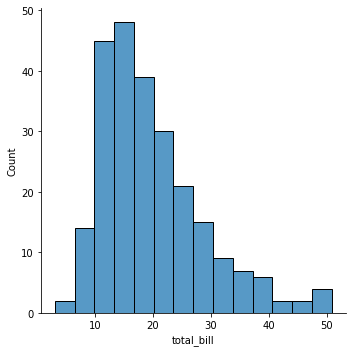

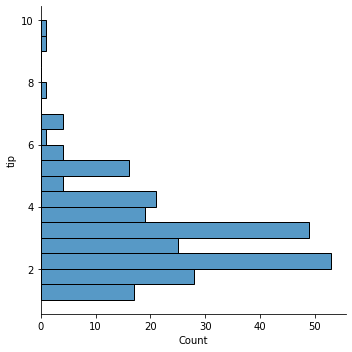

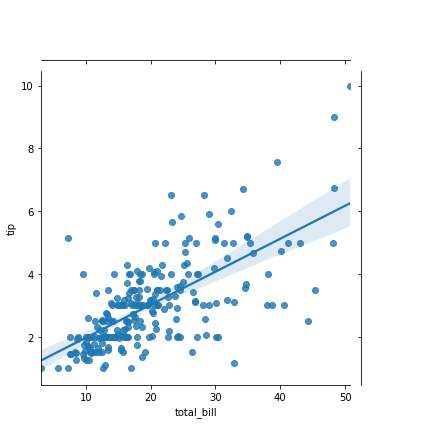

In [53]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.displot)

# Style and Color

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Styles

<AxesSubplot:xlabel='sex', ylabel='count'>

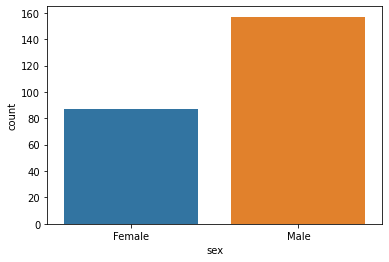

In [55]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

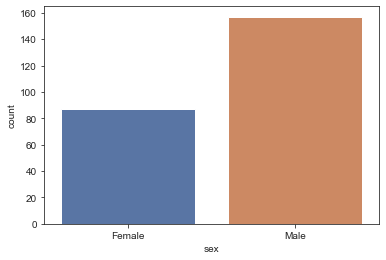

In [56]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips, palette='deep')

## Spine Removal

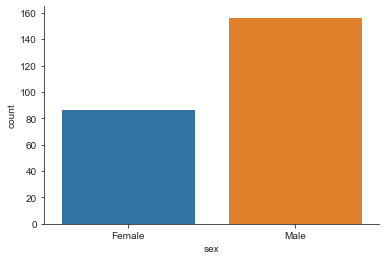

In [57]:
sns.countplot(x='sex', data=tips)
sns.despine()

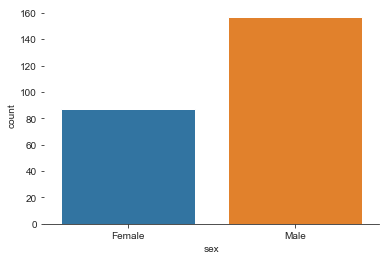

In [58]:
sns.countplot(x='sex', data=tips)
sns.despine(left=True)

## Size and Aspect

Use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

<AxesSubplot:xlabel='sex', ylabel='count'>

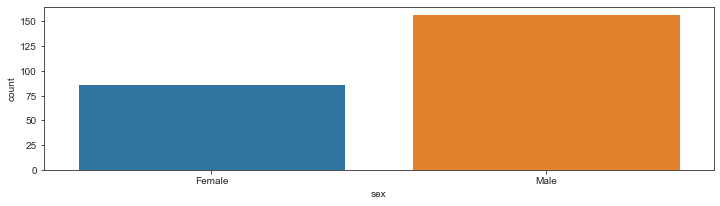

In [59]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)

## Scale and Context

`set_context()` to override default parameters:

<AxesSubplot:xlabel='sex', ylabel='count'>

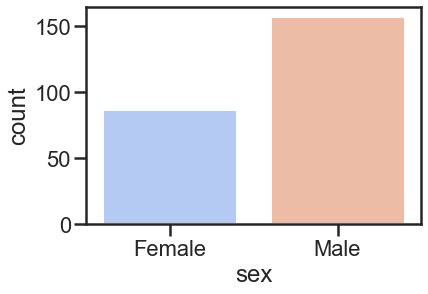

In [60]:
sns.set_context('poster', font_scale=1) # change font_scale
sns.countplot(x='sex', data=tips, palette='coolwarm')

# Exercises

** Recreate the plots below using the titanic dataframe.**

** *NOTE: IN ORDER NOT TO LOSE THE PLOT IMAGE, MAKE SURE YO DO NOT CODE IN THE CELL THAT IS DIRECTLY ABOVE THE PLOT, THERE IS AN EXTRA CELL ABOVE THAT ONE WHICH WILL NOT OVERWRITE THE PLOT!* **

## The Data

We will be working with a famous titanic data set for these exercises. 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
#titanic = pd.read_csv('titanic.csv') # local dataset
# use then sns. order=['First','Second','Third']

# Seaborn official dataset. Small amount of preprocessing is applied 
# to define a proper ordering for categorical variables.
titanic = sns.load_dataset('titanic') 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exercise 1

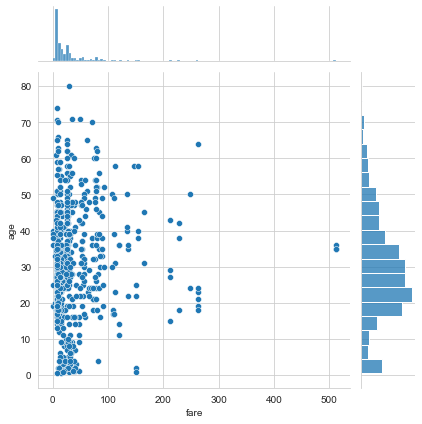

In [6]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns.jointplot(x='fare', y='age', data=titanic)

![Ex1 Plot](./Seaborn_Ex_Plots/Ex1.PNG)

### Exercise 2

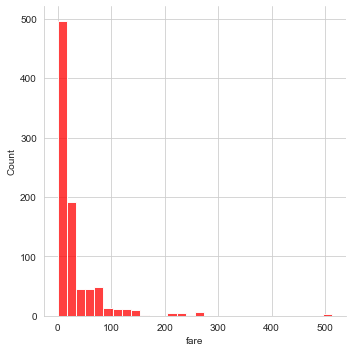

In [43]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!


sns.displot(titanic['fare'],bins=30, kde=False, color='red')

![Ex2 Plot](./Seaborn_Ex_Plots/Ex2.PNG)

### Exercise 3

<AxesSubplot:xlabel='class', ylabel='age'>

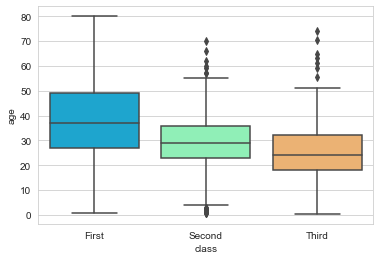

In [44]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!


sns.boxplot(x='class', y='age', data=titanic, palette='rainbow')

![Ex3 Plot](./Seaborn_Ex_Plots/Ex3.PNG)

### Exercise 4

<AxesSubplot:xlabel='class', ylabel='age'>

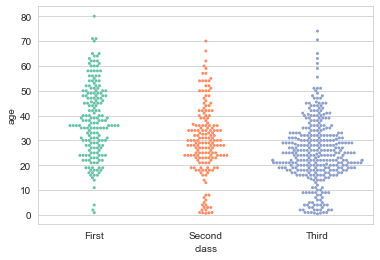

In [46]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns.swarmplot(x='class', y='age', data=titanic, palette='Set2', order=['First','Second','Third'],s=3 )

![Ex4 Plot](./Seaborn_Ex_Plots/Ex4.PNG)

### Exercise 5

<AxesSubplot:xlabel='sex', ylabel='count'>

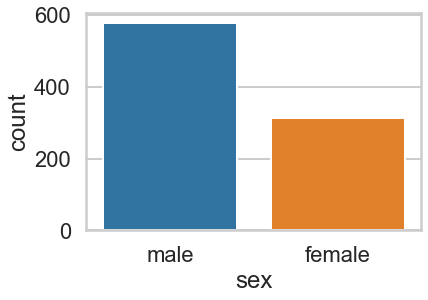

In [68]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns.countplot(x='sex', data=titanic)

![Ex5 Plot](./Seaborn_Ex_Plots/Ex5.PNG)

### Exercise 6

Text(0.5, 1.0, 'titanic.corr()')

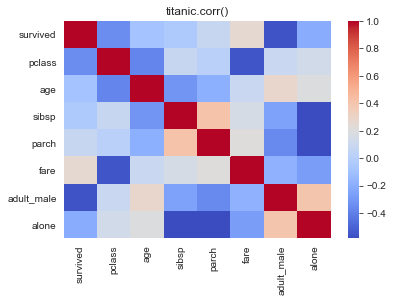

In [47]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

sns.heatmap(titanic.corr(), cmap='coolwarm')
plt.title('titanic.corr()')

![Ex6 Plot](./Seaborn_Ex_Plots/Ex6.PNG)

### Exercise 7

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


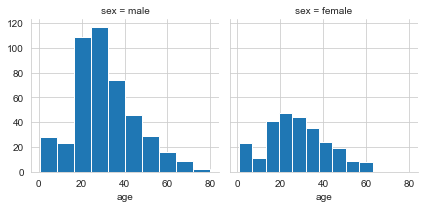

In [14]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!


g = sns.FacetGrid(data=titanic, col='sex')
g.map(plt.hist,'age')

![Ex7 Plot](./Seaborn_Ex_Plots/Ex7.PNG)